# Notebook para demonstração de como criar um RNA utilizando a ferramenta Keras

In [ ]:
#importando as bibliotecas necessárias
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MNIST é um conjunto de imagens de números escritos à mão (Modified National Institute of Standards and Technology database) tamanho 28x28
imagens = keras.datasets.fashion_mnist
(treino_imagens, treino_labels), (teste_imagens, teste_labels) = imagens.load_data()

In [ ]:
#vendo as dimensões das bases criadas
print(treino_imagens.shape)
print(teste_imagens.shape)
print(np.unique(treino_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


9


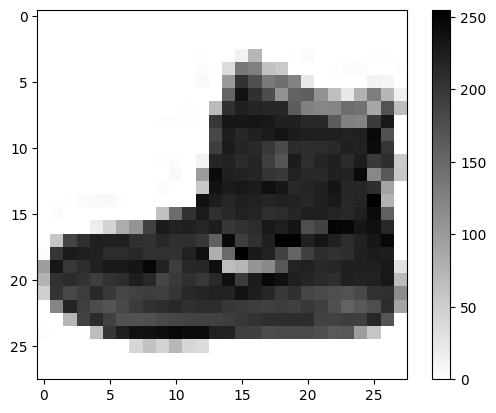

In [ ]:
#mostrando uma imagem do dataset
plt.figure()
plt.imshow(treino_imagens[0], cmap='binary')
plt.colorbar()
print(str(treino_labels[0]))

In [ ]:
#analisando a base de treino
treino_imagens

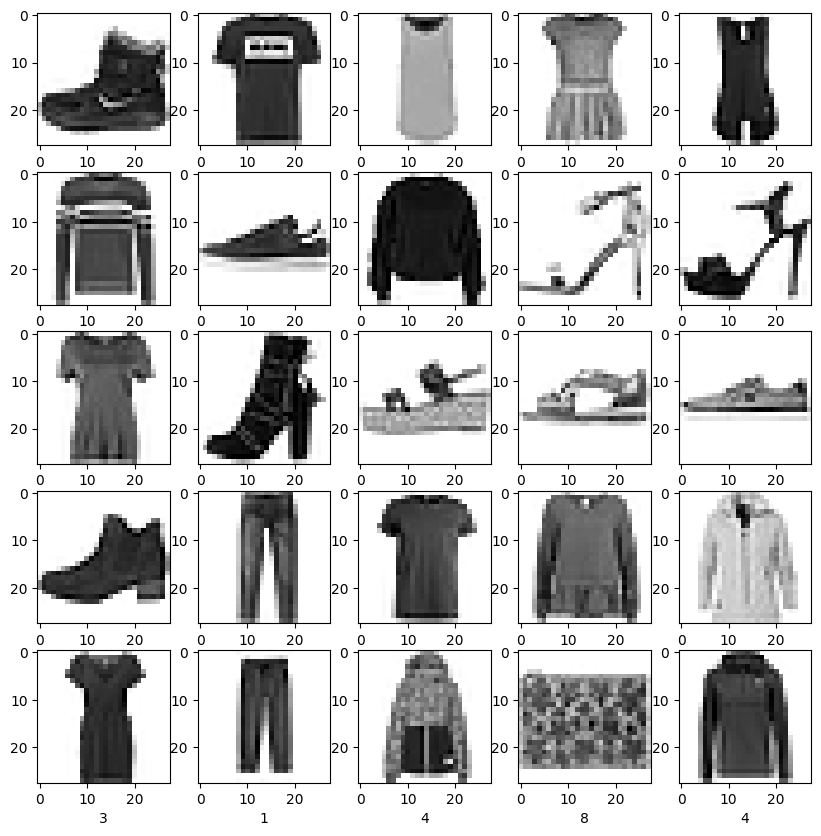

In [ ]:
#Vendo algumas imagens da base de treino
treino_imagens = treino_imagens / 255
teste_imagens = teste_imagens / 255

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(treino_imagens[i], cmap='binary')
  plt.xlabel(treino_labels[i])

In [ ]:
#criando a RNA
modelo = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(128,activation=tf.nn.relu),
                            keras.layers.Dense(16,activation=tf.nn.softmax),
])

modelo.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#vendo um resumo do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 102544 (400.56 KB)
Trainable params: 102544 (400.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#treinando o modelo
modelo.fit(treino_imagens, treino_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5108 - accuracy: 0.8187
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3781 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3450 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3268 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3113 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3023 - accuracy: 0.8927
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.8975
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2868 - accuracy: 0.8998
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2808 - accuracy: 0.9010
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.276

In [ ]:
#avaliando os resultados do treinamento
teste_loss, teste_acu = modelo.evaluate(teste_imagens, teste_labels)

print(teste_loss)
print(teste_acu)

313/313 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8773
0.380008339881897
0.8773000240325928
